<a href="https://colab.research.google.com/github/MarcusLongton/Capstone_Project_Marcus_Longton/blob/main/Capstone_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis for Capstone Project on Predicting Ocean Water Turbidity

In [51]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

## Reading in our data from EDI (Enviromental Data Initiative Portal)

In [3]:
# Package ID: knb-lter-vcr.265.3 Cataloging System:https://pasta.edirepository.org.
# Data set title: Wave and turbidity measurements, Fowling Point, Hog Island Bay, VA, Summer 2016.
# Data set creator:  Patricia Wiberg -
# Metadata Provider:    - Virginia Coast Reserve Long-Term Ecological Research Project
# Contact:  Patricia Wiberg -    - pw3c@virginia.edu
# Contact:    - Information manager - Virginia Coast Reserve Long-Term Ecological Research Project   - jporter@lternet.edu
# Stylesheet v1.3 for metadata conversion into program: John H. Porter, Univ. Virginia, jporter@virginia.edu
#
# This program creates numbered PANDA dataframes named dt1,dt2,dt3...,
# one for each data table in the dataset. It also provides some basic
# summaries of their contents. NumPy and Pandas modules need to be installed
# for the program to run.

import numpy as np
import pandas as pd

infile1  ="https://pasta.lternet.edu/package/data/eml/knb-lter-vcr/265/3/7bd98428fe1dea3312c8e09f49454725".strip()
infile1  = infile1.replace("https://","http://")

dt1 =pd.read_csv(infile1
          ,storage_options={'User-Agent':'EDI_CodeGen'}
          ,skiprows=1
            ,sep=","
                ,quotechar='"'
           , names=[
                    "DATETIME",
                    "WACH_WS",
                    "WACH_WD",
                    "WACH_AT",
                    "WACH_BARO",
                    "DateTimeWL",
                    "WACH_MT",
                    "WACH_PT",
                    "WACH_WT",
                    "FT_YR",
                    "FT_MO",
                    "FT_DY",
                    "FT_HRLST",
                    "FT_MN",
                    "FT_WS",
                    "FT_WD",
                    "Bay_YD_ADP",
                    "Bay_Depth_ADP",
                    "Bay_WT_ADP",
                    "Bay_CSpd_40cm",
                    "Bay_SS_40cm",
                    "Bay_UB_ADP",
                    "Bay_Time_RBR_51114",
                    "Bay_Depth_RBR_51114",
                    "Bay_Hs_RBR_51114",
                    "Bay_Tav_RBR_51114",
                    "Bay_WT_RBR_51114",
                    "Bay_Press_RBR_51114",
                    "Bay_Time_RBR_054076",
                    "Bay_Turb_RBR_054076",
                    "Flat_Time_RBR_051115",
                    "Flat_Depth_051115",
                    "Flat_Hs_051115",
                    "Flat_Tav_051115",
                    "Flat_WT_051115",
                    "Flat_Pres_051115",
                    "Flat_Time_RBR_054077",
                    "Flat_Turb_054077",
                    "OutEdge_Time_021639",
                    "OutEdge_DepCorr_021639",
                    "OutEdge_Hs_021639",
                    "OutEdge_Tav_021639",
                    "OutEdge_WT_021639",
                    "OutEdge_Pres_021639",
                    "InEdge_Time_RBR_021640",
                    "InEdge_Depth_021640",
                    "InEdge_Hs_021640",
                    "InEdge_Tav_021640",
                    "InEdge_WT_021640",
                    "InEdge_Pres_021640",
                    "Int1_Time_RBR_021640",
                    "Int1_Depth_021640",
                    "Int1_Hs_021640",
                    "Int1_Tav_021640",
                    "Int1_WT_021640",
                    "Int1_Pres_021640",
                    "Int2_Time_RBR_015482",
                    "Int2_Depth_015482",
                    "Int2_Hs_015482",
                    "Int2_Tav_015482",
                    "Int2_WT_015482",
                    "Int2_Pres_015482"    ]
# data type checking is commented out because it may cause data
# loads to fail if the data contains inconsistent values. Uncomment
# the following lines to enable data type checking

#            ,dtype={
#             'DATETIME':'str' ,
#             'WACH_WS':'float' ,
#             'WACH_WD':'int' ,
#             'WACH_AT':'float' ,
#             'WACH_BARO':'float' ,
#             'DateTimeWL':'str' ,
#             'WACH_MT':'float' ,
#             'WACH_PT':'float' ,
#             'WACH_WT':'float' ,
#             'FT_YR':'int' ,
#             'FT_MO':'int' ,
#             'FT_DY':'int' ,
#             'FT_HRLST':'int' ,
#             'FT_MN':'int' ,
#             'FT_WS':'float' ,
#             'FT_WD':'float' ,
#             'Bay_YD_ADP':'float' ,
#             'Bay_Depth_ADP':'float' ,
#             'Bay_WT_ADP':'float' ,
#             'Bay_CSpd_40cm':'float' ,
#             'Bay_SS_40cm':'float' ,
#             'Bay_UB_ADP':'float' ,
#             'Bay_Time_RBR_51114':'str' ,
#             'Bay_Depth_RBR_51114':'float' ,
#             'Bay_Hs_RBR_51114':'float' ,
#             'Bay_Tav_RBR_51114':'float' ,
#             'Bay_WT_RBR_51114':'float' ,
#             'Bay_Press_RBR_51114':'float' ,
#             'Bay_Time_RBR_054076':'str' ,
#             'Bay_Turb_RBR_054076':'float' ,
#             'Flat_Time_RBR_051115':'str' ,
#             'Flat_Depth_051115':'float' ,
#             'Flat_Hs_051115':'float' ,
#             'Flat_Tav_051115':'float' ,
#             'Flat_WT_051115':'float' ,
#             'Flat_Pres_051115':'float' ,
#             'Flat_Time_RBR_054077':'str' ,
#             'Flat_Turb_054077':'float' ,
#             'OutEdge_Time_021639':'str' ,
#             'OutEdge_DepCorr_021639':'float' ,
#             'OutEdge_Hs_021639':'float' ,
#             'OutEdge_Tav_021639':'float' ,
#             'OutEdge_WT_021639':'float' ,
#             'OutEdge_Pres_021639':'float' ,
#             'InEdge_Time_RBR_021640':'str' ,
#             'InEdge_Depth_021640':'float' ,
#             'InEdge_Hs_021640':'float' ,
#             'InEdge_Tav_021640':'float' ,
#             'InEdge_WT_021640':'float' ,
#             'InEdge_Pres_021640':'float' ,
#             'Int1_Time_RBR_021640':'str' ,
#             'Int1_Depth_021640':'float' ,
#             'Int1_Hs_021640':'float' ,
#             'Int1_Tav_021640':'float' ,
#             'Int1_WT_021640':'float' ,
#             'Int1_Pres_021640':'float' ,
#             'Int2_Time_RBR_015482':'str' ,
#             'Int2_Depth_015482':'float' ,
#             'Int2_Hs_015482':'float' ,
#             'Int2_Tav_015482':'float' ,
#             'Int2_WT_015482':'float' ,
#             'Int2_Pres_015482':'float'
#        }
          ,parse_dates=[
                        'DATETIME',
                        'DateTimeWL',
                        'Bay_Time_RBR_51114',
                        'Bay_Time_RBR_054076',
                        'Flat_Time_RBR_051115',
                        'Flat_Time_RBR_054077',
                        'OutEdge_Time_021639',
                        'InEdge_Time_RBR_021640',
                        'Int1_Time_RBR_021640',
                        'Int2_Time_RBR_015482',
                ]
    )
# Coerce the data into the types specified in the metadata
# Since date conversions are tricky, the coerced dates will go into a new column with _datetime appended
# This new column is added to the dataframe but does not show up in automated summaries below.
dt1=dt1.assign(DATETIME_datetime=pd.to_datetime(dt1.DATETIME,errors='coerce'))
dt1.WACH_WS=pd.to_numeric(dt1.WACH_WS,errors='coerce')
dt1.WACH_WD=pd.to_numeric(dt1.WACH_WD,errors='coerce',downcast='integer')
dt1.WACH_AT=pd.to_numeric(dt1.WACH_AT,errors='coerce')
dt1.WACH_BARO=pd.to_numeric(dt1.WACH_BARO,errors='coerce')
# Since date conversions are tricky, the coerced dates will go into a new column with _datetime appended
# This new column is added to the dataframe but does not show up in automated summaries below.
dt1=dt1.assign(DateTimeWL_datetime=pd.to_datetime(dt1.DateTimeWL,errors='coerce'))
dt1.WACH_MT=pd.to_numeric(dt1.WACH_MT,errors='coerce')
dt1.WACH_PT=pd.to_numeric(dt1.WACH_PT,errors='coerce')
dt1.WACH_WT=pd.to_numeric(dt1.WACH_WT,errors='coerce')
dt1.FT_YR=pd.to_numeric(dt1.FT_YR,errors='coerce',downcast='integer')
dt1.FT_MO=pd.to_numeric(dt1.FT_MO,errors='coerce',downcast='integer')
dt1.FT_DY=pd.to_numeric(dt1.FT_DY,errors='coerce',downcast='integer')
dt1.FT_HRLST=pd.to_numeric(dt1.FT_HRLST,errors='coerce',downcast='integer')
dt1.FT_MN=pd.to_numeric(dt1.FT_MN,errors='coerce',downcast='integer')
dt1.FT_WS=pd.to_numeric(dt1.FT_WS,errors='coerce')
dt1.FT_WD=pd.to_numeric(dt1.FT_WD,errors='coerce')
dt1.Bay_YD_ADP=pd.to_numeric(dt1.Bay_YD_ADP,errors='coerce')
dt1.Bay_Depth_ADP=pd.to_numeric(dt1.Bay_Depth_ADP,errors='coerce')
dt1.Bay_WT_ADP=pd.to_numeric(dt1.Bay_WT_ADP,errors='coerce')
dt1.Bay_CSpd_40cm=pd.to_numeric(dt1.Bay_CSpd_40cm,errors='coerce')
dt1.Bay_SS_40cm=pd.to_numeric(dt1.Bay_SS_40cm,errors='coerce')
dt1.Bay_UB_ADP=pd.to_numeric(dt1.Bay_UB_ADP,errors='coerce')
# Since date conversions are tricky, the coerced dates will go into a new column with _datetime appended
# This new column is added to the dataframe but does not show up in automated summaries below.
dt1=dt1.assign(Bay_Time_RBR_51114_datetime=pd.to_datetime(dt1.Bay_Time_RBR_51114,errors='coerce'))
dt1.Bay_Depth_RBR_51114=pd.to_numeric(dt1.Bay_Depth_RBR_51114,errors='coerce')
dt1.Bay_Hs_RBR_51114=pd.to_numeric(dt1.Bay_Hs_RBR_51114,errors='coerce')
dt1.Bay_Tav_RBR_51114=pd.to_numeric(dt1.Bay_Tav_RBR_51114,errors='coerce')
dt1.Bay_WT_RBR_51114=pd.to_numeric(dt1.Bay_WT_RBR_51114,errors='coerce')
dt1.Bay_Press_RBR_51114=pd.to_numeric(dt1.Bay_Press_RBR_51114,errors='coerce')
# Since date conversions are tricky, the coerced dates will go into a new column with _datetime appended
# This new column is added to the dataframe but does not show up in automated summaries below.
dt1=dt1.assign(Bay_Time_RBR_054076_datetime=pd.to_datetime(dt1.Bay_Time_RBR_054076,errors='coerce'))
dt1.Bay_Turb_RBR_054076=pd.to_numeric(dt1.Bay_Turb_RBR_054076,errors='coerce')
# Since date conversions are tricky, the coerced dates will go into a new column with _datetime appended
# This new column is added to the dataframe but does not show up in automated summaries below.
dt1=dt1.assign(Flat_Time_RBR_051115_datetime=pd.to_datetime(dt1.Flat_Time_RBR_051115,errors='coerce'))
dt1.Flat_Depth_051115=pd.to_numeric(dt1.Flat_Depth_051115,errors='coerce')
dt1.Flat_Hs_051115=pd.to_numeric(dt1.Flat_Hs_051115,errors='coerce')
dt1.Flat_Tav_051115=pd.to_numeric(dt1.Flat_Tav_051115,errors='coerce')
dt1.Flat_WT_051115=pd.to_numeric(dt1.Flat_WT_051115,errors='coerce')
dt1.Flat_Pres_051115=pd.to_numeric(dt1.Flat_Pres_051115,errors='coerce')
# Since date conversions are tricky, the coerced dates will go into a new column with _datetime appended
# This new column is added to the dataframe but does not show up in automated summaries below.
dt1=dt1.assign(Flat_Time_RBR_054077_datetime=pd.to_datetime(dt1.Flat_Time_RBR_054077,errors='coerce'))
dt1.Flat_Turb_054077=pd.to_numeric(dt1.Flat_Turb_054077,errors='coerce')
# Since date conversions are tricky, the coerced dates will go into a new column with _datetime appended
# This new column is added to the dataframe but does not show up in automated summaries below.
dt1=dt1.assign(OutEdge_Time_021639_datetime=pd.to_datetime(dt1.OutEdge_Time_021639,errors='coerce'))
dt1.OutEdge_DepCorr_021639=pd.to_numeric(dt1.OutEdge_DepCorr_021639,errors='coerce')
dt1.OutEdge_Hs_021639=pd.to_numeric(dt1.OutEdge_Hs_021639,errors='coerce')
dt1.OutEdge_Tav_021639=pd.to_numeric(dt1.OutEdge_Tav_021639,errors='coerce')
dt1.OutEdge_WT_021639=pd.to_numeric(dt1.OutEdge_WT_021639,errors='coerce')
dt1.OutEdge_Pres_021639=pd.to_numeric(dt1.OutEdge_Pres_021639,errors='coerce')
# Since date conversions are tricky, the coerced dates will go into a new column with _datetime appended
# This new column is added to the dataframe but does not show up in automated summaries below.
dt1=dt1.assign(InEdge_Time_RBR_021640_datetime=pd.to_datetime(dt1.InEdge_Time_RBR_021640,errors='coerce'))
dt1.InEdge_Depth_021640=pd.to_numeric(dt1.InEdge_Depth_021640,errors='coerce')
dt1.InEdge_Hs_021640=pd.to_numeric(dt1.InEdge_Hs_021640,errors='coerce')
dt1.InEdge_Tav_021640=pd.to_numeric(dt1.InEdge_Tav_021640,errors='coerce')
dt1.InEdge_WT_021640=pd.to_numeric(dt1.InEdge_WT_021640,errors='coerce')
dt1.InEdge_Pres_021640=pd.to_numeric(dt1.InEdge_Pres_021640,errors='coerce')
# Since date conversions are tricky, the coerced dates will go into a new column with _datetime appended
# This new column is added to the dataframe but does not show up in automated summaries below.
dt1=dt1.assign(Int1_Time_RBR_021640_datetime=pd.to_datetime(dt1.Int1_Time_RBR_021640,errors='coerce'))
dt1.Int1_Depth_021640=pd.to_numeric(dt1.Int1_Depth_021640,errors='coerce')
dt1.Int1_Hs_021640=pd.to_numeric(dt1.Int1_Hs_021640,errors='coerce')
dt1.Int1_Tav_021640=pd.to_numeric(dt1.Int1_Tav_021640,errors='coerce')
dt1.Int1_WT_021640=pd.to_numeric(dt1.Int1_WT_021640,errors='coerce')
dt1.Int1_Pres_021640=pd.to_numeric(dt1.Int1_Pres_021640,errors='coerce')
# Since date conversions are tricky, the coerced dates will go into a new column with _datetime appended
# This new column is added to the dataframe but does not show up in automated summaries below.
dt1=dt1.assign(Int2_Time_RBR_015482_datetime=pd.to_datetime(dt1.Int2_Time_RBR_015482,errors='coerce'))
dt1.Int2_Depth_015482=pd.to_numeric(dt1.Int2_Depth_015482,errors='coerce')
dt1.Int2_Hs_015482=pd.to_numeric(dt1.Int2_Hs_015482,errors='coerce')
dt1.Int2_Tav_015482=pd.to_numeric(dt1.Int2_Tav_015482,errors='coerce')
dt1.Int2_WT_015482=pd.to_numeric(dt1.Int2_WT_015482,errors='coerce')
dt1.Int2_Pres_015482=pd.to_numeric(dt1.Int2_Pres_015482,errors='coerce')

print("Here is a description of the data frame dt1 and number of lines\n")
print(dt1.info())
print("--------------------\n\n")
print("Here is a summary of numerical variables in the data frame dt1\n")
print(dt1.describe())
print("--------------------\n\n")

<ipython-input-3-40809e1e69fd>:20: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S.%f format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dt1 =pd.read_csv(infile1
<ipython-input-3-40809e1e69fd>:20: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S.%f format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dt1 =pd.read_csv(infile1
<ipython-input-3-40809e1e69fd>:20: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S.%f format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dt1 =pd.read_csv(infile1
<ipython-input-3-40809e1e69fd>:20: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S.%f format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dt1 =pd.read_csv(infile1
<ipython-input-3-40809e1e69fd>:222: UserWarning: Parsing dat

Here is a description of the data frame dt1 and number of lines

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 72 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   DATETIME                         1000 non-null   datetime64[ns]
 1   WACH_WS                          1000 non-null   float64       
 2   WACH_WD                          1000 non-null   int16         
 3   WACH_AT                          1000 non-null   float64       
 4   WACH_BARO                        1000 non-null   float64       
 5   DateTimeWL                       1000 non-null   datetime64[ns]
 6   WACH_MT                          1000 non-null   float64       
 7   WACH_PT                          1000 non-null   float64       
 8   WACH_WT                          1000 non-null   float64       
 9   FT_YR                            1000 non-null   int16         
 

In [4]:
# Taking a look at our columns
dt1.columns

Index(['DATETIME', 'WACH_WS', 'WACH_WD', 'WACH_AT', 'WACH_BARO', 'DateTimeWL',
       'WACH_MT', 'WACH_PT', 'WACH_WT', 'FT_YR', 'FT_MO', 'FT_DY', 'FT_HRLST',
       'FT_MN', 'FT_WS', 'FT_WD', 'Bay_YD_ADP', 'Bay_Depth_ADP', 'Bay_WT_ADP',
       'Bay_CSpd_40cm', 'Bay_SS_40cm', 'Bay_UB_ADP', 'Bay_Time_RBR_51114',
       'Bay_Depth_RBR_51114', 'Bay_Hs_RBR_51114', 'Bay_Tav_RBR_51114',
       'Bay_WT_RBR_51114', 'Bay_Press_RBR_51114', 'Bay_Time_RBR_054076',
       'Bay_Turb_RBR_054076', 'Flat_Time_RBR_051115', 'Flat_Depth_051115',
       'Flat_Hs_051115', 'Flat_Tav_051115', 'Flat_WT_051115',
       'Flat_Pres_051115', 'Flat_Time_RBR_054077', 'Flat_Turb_054077',
       'OutEdge_Time_021639', 'OutEdge_DepCorr_021639', 'OutEdge_Hs_021639',
       'OutEdge_Tav_021639', 'OutEdge_WT_021639', 'OutEdge_Pres_021639',
       'InEdge_Time_RBR_021640', 'InEdge_Depth_021640', 'InEdge_Hs_021640',
       'InEdge_Tav_021640', 'InEdge_WT_021640', 'InEdge_Pres_021640',
       'Int1_Time_RBR_021640', 'Int1_Dep

# Descriptions of Variables


* 'DATETIME': Date and Time  
* 'WACH_WS': Wachaperague Wind Speed (meterPerSecond)
* 'WACH_WD': Wachaperague Wind Direction (degree)  
* 'WACH_AT': Wachaperague Air Temperature (degreeCelsius)
* 'WACH_BARO': Wachaperague Barometric Pressure (millibar)
* 'DateTimeWL': Date and Time
* 'WACH_MT': Wachaperague Measured Tide (interval measured in meters)
* 'WACH_PT': Wachaperague Predicted Tide (interval measured in meters)
* 'WACH_WT': Wachaperague Water Temperature (degreeCelsius)
* 'FT_YR': Flux Tower Year
* 'FT_MO': Flux Tower Month
* 'FT_DY': Flux Tower Day
* 'FT_HRLST': Flux Tower Hour
* 'FT_MN': Flux Tower Minute
* 'FT_WS': Flux Tower Wind Speed (meterPerSecond)
* 'FT_WD': Flux Tower Wind Direction (degree)
* 'Bay_YD_ADP': Bay (ADP) Year Day (day)
* 'Bay_Depth_ADP': Bay (ADP) Depth (meter)
* 'Bay_WT_ADP': Bay (ADP) Water Temperature (degreeCelsius)
* 'Bay_CSpd_40cm': Bay  ADP) Current Speed (meterPerSecond)
* 'Bay_SS_40cm': Bay (ADP) Signal Strength (none)
* 'Bay_UB_ADP': Bay (ADP) Water Bottom Orbital Velocity (meterPerSecond)
* 'Bay_Time_RBR_51114': Bay (RBR) Date and Time
* 'Bay_Depth_RBR_51114': Bay (RBR) Depth (meter)
* 'Bay_Hs_RBR_51114': Bay (RBR) Significant Wave Height (meter)
* 'Bay_Tav_RBR_51114': Bay (RBR) Average Wave Period (second)
* 'Bay_WT_RBR_51114': Bay (RBR) Water Temperature (degreeCelsius)
* 'Bay_Press_RBR_51114': Bay (RBR) Pressure (decibar)
* 'Bay_Time_RBR_054076': Bay (RBR) Date and Time
### **'Bay_Turb_RBR_054076': Bay Turbidity (NTU) ((Target Variable))**
* 'Flat_Time_RBR_051115': Date Time
* 'Flat_Depth_051115': Flat Depth (meter)
* 'Flat_Hs_051115': Flat Significant Wave Height (meter)
* 'Flat_Tav_051115': Flat Average Wave Period (second)
* 'Flat_WT_051115': Flat Water Temperature (degreeCelsius)
* 'Flat_Pres_051115': Flat Pressure (decibar)
* 'Flat_Time_RBR_054077': Date and Time
### **'Flat_Turb_054077': Flat Turbidity (NTU) ((Target Variable))**
* 'OutEdge_Time_021639': Date and Time
* 'OutEdge_DepCorr_021639': Outer Edge Depth (meter)
* 'OutEdge_Hs_021639': Outer Edge Significant Wave Height (meter)
* 'OutEdge_Tav_021639': Outer Edge Average Wave Period (second)
* 'OutEdge_WT_021639': Outer Edge Water Temperature (degreeCelsius)
* 'OutEdge_Pres_021639': Outer Edge Pressure (decibar)
* 'InEdge_Time_RBR_021640': Date and Time
* 'InEdge_Depth_021640': Inner Edge Depth (meter)
* 'InEdge_Hs_021640': Inner Edge Significant Wave Height (meter)
* 'InEdge_Tav_021640': Inner Edge Average Wave Period (second)
* 'InEdge_WT_021640': Inner Edge Water Temperature (degreeCelsius)
* 'InEdge_Pres_021640': Inner Edge Pressure (decibar)
* 'Int1_Time_RBR_021640': Date and Time
* 'Int1_Depth_021640': Marsh Interior 1 Depth (meter)
* 'Int1_Hs_021640': Marsh Interior 1 Significant Wave Height (meter)
* 'Int1_Tav_021640': Marsh Interior 1 Average Wave Period (second)
* 'Int1_WT_021640': Marsh Interior 1 Water Temperature (degreeC)
* 'Int1_Pres_021640': Marsh Interior 1 Pressure (decibar)
* 'Int2_Time_RBR_015482': Marsh Interior 2 Date and Time
* 'Int2_Depth_015482': Marsh Interior 2 Depth (meter)
* 'Int2_Hs_015482': Marsh Interior 2 Significant Wave Height (meter)
* 'Int2_Tav_015482': Marsh Interior 2 Average Wave Period (second)
* 'Int2_WT_015482': Marsh Interior 2 Water Temperature (degreeC)
* 'Int2_Pres_015482': Marsh Interior 2 Pressure (decibar)




#Description of Data

This data is compiled from a study titled

> *Wave and turbidity measurements, Fowling Point, Hog Island Bay, VA, Summer 2016*

The abstract from the study states the following:


> "The measurements were made to support marsh depositional modeling being carried out as part of an NSF-sponsored Coastal SEES research project."

The study took measurement from the following 9 locations.

1.   Wachaperague
2.   Flux Tower
3.   Bay (ADP)
4.   Bay (RBR)
5.   Flat
6.   Outer Edge
7.   Inner Edge
8.   Marsh Interior 1
9.   Marsh Interior 2

These locations all took similar measurements of things such as averge wave period, significant wave height, water temperature, ect.

Only two of the locations recored turbidty data which is our target variable, thus, for this project, we will only be using data from locations 4 and 5 (Bay RBR and Flat)







#Data Cleaning



*   Getting Rid of Erronious Variables
*   Addressing missing values



In [5]:
# Creating a of variables to remove
dt1.columns

Index(['DATETIME', 'WACH_WS', 'WACH_WD', 'WACH_AT', 'WACH_BARO', 'DateTimeWL',
       'WACH_MT', 'WACH_PT', 'WACH_WT', 'FT_YR', 'FT_MO', 'FT_DY', 'FT_HRLST',
       'FT_MN', 'FT_WS', 'FT_WD', 'Bay_YD_ADP', 'Bay_Depth_ADP', 'Bay_WT_ADP',
       'Bay_CSpd_40cm', 'Bay_SS_40cm', 'Bay_UB_ADP', 'Bay_Time_RBR_51114',
       'Bay_Depth_RBR_51114', 'Bay_Hs_RBR_51114', 'Bay_Tav_RBR_51114',
       'Bay_WT_RBR_51114', 'Bay_Press_RBR_51114', 'Bay_Time_RBR_054076',
       'Bay_Turb_RBR_054076', 'Flat_Time_RBR_051115', 'Flat_Depth_051115',
       'Flat_Hs_051115', 'Flat_Tav_051115', 'Flat_WT_051115',
       'Flat_Pres_051115', 'Flat_Time_RBR_054077', 'Flat_Turb_054077',
       'OutEdge_Time_021639', 'OutEdge_DepCorr_021639', 'OutEdge_Hs_021639',
       'OutEdge_Tav_021639', 'OutEdge_WT_021639', 'OutEdge_Pres_021639',
       'InEdge_Time_RBR_021640', 'InEdge_Depth_021640', 'InEdge_Hs_021640',
       'InEdge_Tav_021640', 'InEdge_WT_021640', 'InEdge_Pres_021640',
       'Int1_Time_RBR_021640', 'Int1_Dep

In [6]:
# Columns for removal
cols_to_remove = ['DATETIME', 'WACH_WS', 'WACH_WD', 'WACH_AT', 'WACH_BARO', 'DateTimeWL',
       'WACH_MT', 'WACH_PT', 'WACH_WT', 'FT_YR', 'FT_MO', 'FT_DY', 'FT_HRLST',
       'FT_MN', 'FT_WS', 'FT_WD', 'Bay_YD_ADP', 'Bay_Depth_ADP', 'Bay_WT_ADP',
       'Bay_CSpd_40cm', 'Bay_SS_40cm', 'Bay_UB_ADP','OutEdge_Time_021639', 'OutEdge_DepCorr_021639', 'OutEdge_Hs_021639',
       'OutEdge_Tav_021639', 'OutEdge_WT_021639', 'OutEdge_Pres_021639',
       'InEdge_Time_RBR_021640', 'InEdge_Depth_021640', 'InEdge_Hs_021640',
       'InEdge_Tav_021640', 'InEdge_WT_021640', 'InEdge_Pres_021640',
       'Int1_Time_RBR_021640', 'Int1_Depth_021640', 'Int1_Hs_021640',
       'Int1_Tav_021640', 'Int1_WT_021640', 'Int1_Pres_021640',
       'Int2_Time_RBR_015482', 'Int2_Depth_015482', 'Int2_Hs_015482',
       'Int2_Tav_015482', 'Int2_WT_015482', 'Int2_Pres_015482',
       'DATETIME_datetime', 'DateTimeWL_datetime',
       'Bay_Time_RBR_51114_datetime', 'Bay_Time_RBR_054076_datetime',
       'Flat_Time_RBR_051115_datetime', 'Flat_Time_RBR_054077_datetime',
       'OutEdge_Time_021639_datetime', 'InEdge_Time_RBR_021640_datetime',
       'Int1_Time_RBR_021640_datetime', 'Int2_Time_RBR_015482_datetime']

In [7]:
# Removing Columns
dt1 = dt1.drop(columns=cols_to_remove)

In [8]:
# Checking new column list
dt1.columns

Index(['Bay_Time_RBR_51114', 'Bay_Depth_RBR_51114', 'Bay_Hs_RBR_51114',
       'Bay_Tav_RBR_51114', 'Bay_WT_RBR_51114', 'Bay_Press_RBR_51114',
       'Bay_Time_RBR_054076', 'Bay_Turb_RBR_054076', 'Flat_Time_RBR_051115',
       'Flat_Depth_051115', 'Flat_Hs_051115', 'Flat_Tav_051115',
       'Flat_WT_051115', 'Flat_Pres_051115', 'Flat_Time_RBR_054077',
       'Flat_Turb_054077'],
      dtype='object')

In [9]:
# Checking dataframe shape
dt1.shape

(1000, 16)

In [10]:
# Looking for Missing or null values
dt1.isna().sum()

,0
Bay_Time_RBR_51114,0
Bay_Depth_RBR_51114,0
Bay_Hs_RBR_51114,0
Bay_Tav_RBR_51114,0
Bay_WT_RBR_51114,0
Bay_Press_RBR_51114,0
Bay_Time_RBR_054076,0
Bay_Turb_RBR_054076,0
Flat_Time_RBR_051115,0
Flat_Depth_051115,0


In [11]:
# Checking Data types of our remaining variables
dt1.dtypes

,0
Bay_Time_RBR_51114,datetime64[ns]
Bay_Depth_RBR_51114,float64
Bay_Hs_RBR_51114,float64
Bay_Tav_RBR_51114,float64
Bay_WT_RBR_51114,float64
Bay_Press_RBR_51114,float64
Bay_Time_RBR_054076,datetime64[ns]
Bay_Turb_RBR_054076,float64
Flat_Time_RBR_051115,datetime64[ns]
Flat_Depth_051115,float64


#Data Understanding


*   Making Plots
*   Checking correlations
*   Basic Statistics for each variable



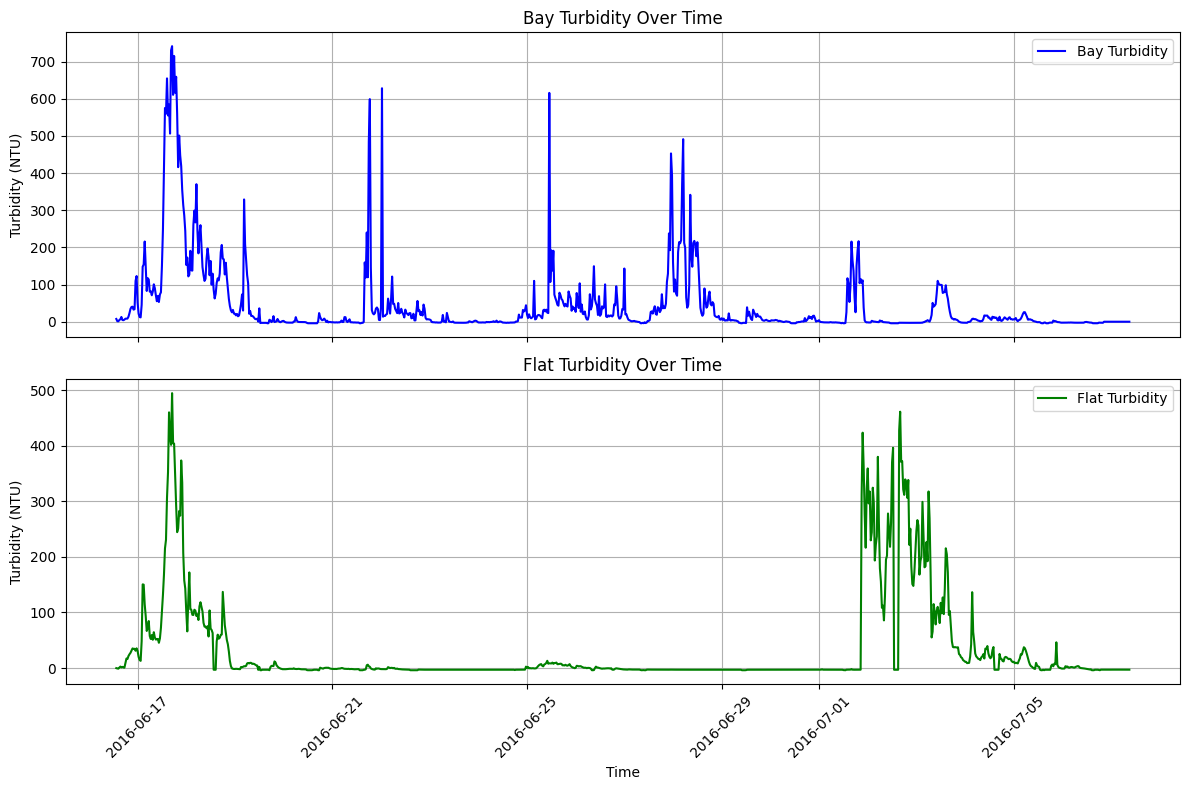

In [13]:
# Create the subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# First subplot - Bay Turbidity
axes[0].plot(dt1['Bay_Time_RBR_51114'], dt1['Bay_Turb_RBR_054076'], label='Bay Turbidity', color='blue')
axes[0].set_ylabel('Turbidity (NTU)')
axes[0].set_title('Bay Turbidity Over Time')
axes[0].legend()
axes[0].grid(True)

# Second subplot - Flat Turbidity
axes[1].plot(dt1['Flat_Time_RBR_051115'], dt1['Flat_Turb_054077'], label='Flat Turbidity', color='green')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Turbidity (NTU)')
axes[1].set_title('Flat Turbidity Over Time')
axes[1].legend()
axes[1].grid(True)

# Improve layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# Looking at Significant Wave Height and Turbidty over time in Bay and Flat locations

# Create 4 vertically stacked subplots sharing the same x-axis
fig = make_subplots(rows=4, cols=1, shared_xaxes=True,
                    subplot_titles=("Bay Turbidity", "Bay Significant Wave Height",
                                    "Flat Turbidity", "Flat Significant Wave Height"))

# Bay Turbidity
fig.add_trace(go.Scatter(x=dt1['Bay_Time_RBR_51114'],
                         y=dt1['Bay_Turb_RBR_054076'],
                         name='Bay Turbidity',
                         line=dict(color='blue')),
              row=1, col=1)

# Bay Significant Wave Height
fig.add_trace(go.Scatter(x=dt1['Bay_Time_RBR_51114'],
                         y=dt1['Bay_Hs_RBR_51114'],
                         name='Bay Wave Height',
                         line=dict(color='green')),
              row=2, col=1)

# Flat Turbidity
fig.add_trace(go.Scatter(x=dt1['Flat_Time_RBR_051115'],
                         y=dt1['Flat_Turb_054077'],
                         name='Flat Turbidity',
                         line=dict(color='purple')),
              row=3, col=1)

# Flat Significant Wave Height
fig.add_trace(go.Scatter(x=dt1['Flat_Time_RBR_051115'],
                         y=dt1['Flat_Hs_051115'],
                         name='Flat Wave Height',
                         line=dict(color='orange')),
              row=4, col=1)

# Update layout
fig.update_layout(height=1000, width=1200,
                  title_text="Turbidity and Wave Height Over Time (Bay and Flat)",
                  showlegend=False)

# Customize axes
fig.update_xaxes(title_text="Time", row=4, col=1)
fig.update_yaxes(title_text="Turbidity (NTU)", row=1, col=1)
fig.update_yaxes(title_text="Wave Height (m)", row=2, col=1)
fig.update_yaxes(title_text="Turbidity (NTU)", row=3, col=1)
fig.update_yaxes(title_text="Wave Height (m)", row=4, col=1)

# Show figure
fig.show()

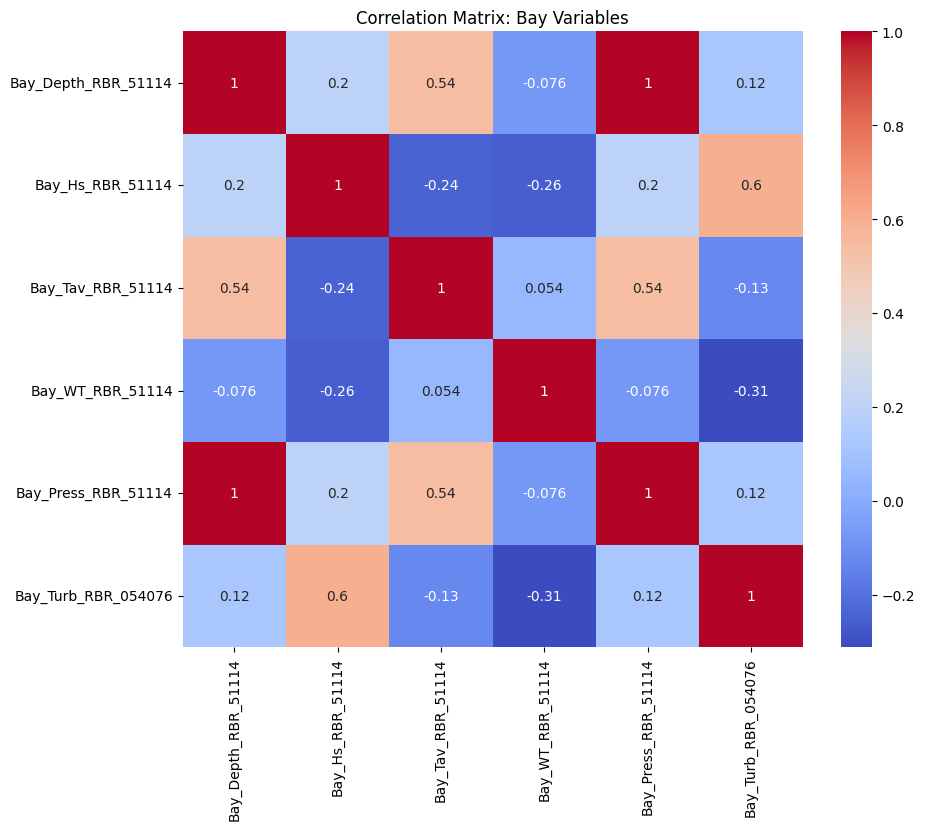

In [15]:
corr = dt1[['Bay_Depth_RBR_51114', 'Bay_Hs_RBR_51114', 'Bay_Tav_RBR_51114',
            'Bay_WT_RBR_51114', 'Bay_Press_RBR_51114', 'Bay_Turb_RBR_054076']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Bay Variables')
plt.show()

In [54]:
'''Before going any further I am going to combine the data from both locations.
I will do this by first creating two separate dataframes, each with their own new column denoting their location.
Then I will concatenate them to have all observations in a larger dataset.'''

# Bay Dataset
bay_df = dt1[['Bay_Time_RBR_51114', 'Bay_Depth_RBR_51114', 'Bay_Hs_RBR_51114',
              'Bay_Tav_RBR_51114', 'Bay_WT_RBR_51114', 'Bay_Press_RBR_51114', 'Bay_Turb_RBR_054076']].copy()
bay_df.columns = ['Time', 'Depth', 'Hs', 'Tav', 'WT', 'Press', 'Turbidity']
bay_df['Location'] = 'Bay'

# Flat Dataset
flat_df = dt1[['Flat_Time_RBR_051115', 'Flat_Depth_051115', 'Flat_Hs_051115',
               'Flat_Tav_051115', 'Flat_WT_051115', 'Flat_Pres_051115', 'Flat_Turb_054077']].copy()
flat_df.columns = ['Time', 'Depth', 'Hs', 'Tav', 'WT', 'Press', 'Turbidity']
flat_df['Location'] = 'Flat'

# Combine
combined_df = pd.concat([bay_df, flat_df], ignore_index=True)

In [73]:
bay_df['Wave_Energy'] = (bay_df['Hs']**2) * (bay_df['Tav'])

In [55]:
# Creating some interaction terms such as wave energy (Significant Wave Height)^2 * (Average Wave Period)

combined_df['Wave_Energy'] = (combined_df['Hs']**2) * (combined_df['Tav'])

In [56]:
combined_df['Location'] = combined_df['Location'].astype('string')

#Feature Engineering for Baseline (Dummy) Model

In [57]:
# Creating a preprocessing pipeline to one-hot-encode, standardize, and scale our data.

#1. Removing the Time aspect for model training
cleaned_df = combined_df.drop(columns=['Time'])

In [58]:
# One-hot-Encoding, standardizing, and Scaling for dummy model

# 1. Define feature groups
numeric_features = ['Depth', 'Hs', 'Tav', 'WT', 'Press', 'Wave_Energy']
categorical_features = ['Location']

# 2. Create Preprocessor

# Numerical: Standard Scaler
num_transformer = StandardScaler()

# Categorical: One-Hot Encoder
cat_transformer = OneHotEncoder(drop='first')

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numeric_features),
        ('cat', cat_transformer, categorical_features)
    ])

In [48]:
# Build Full Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DummyRegressor(strategy='mean')) # will predict the mean value
])

In [64]:
time = combined_df['Time']

In [65]:
# Separating our data
X = cleaned_df.drop(columns=['Turbidity'])
y = cleaned_df['Turbidity']

X_train, X_test, y_train, y_test, time_train, time_test = train_test_split(X, y, time, test_size=0.2, random_state=42)

In [32]:
# Fitting our Pipeline
pipeline.fit(X_train, y_train)

# Predict Values and Evaluate Performance (Train and Test MSE)
y_pred = pipeline.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
train_mse = mean_squared_error(y_train, pipeline.predict(X_train))

# Print Performance Evaluation
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Train MSE: 8462.781351348302
Test MSE: 9311.230703699226


In [33]:
print("Turbidity Range:", y.min(), "to", y.max())
print("Turbidity Mean:", y.mean())
print("Turbidity Std Dev:", y.std())

Turbidity Range: -4.125878621 to 741.4313045
Turbidity Mean: 37.694952785255
Turbidity Std Dev: 92.93067733276044


#Evaluation of Preliminary Results

Our first dummy model has the following respective performance metrics

> Train MSE: **8462.78** | Test MSE: **9311.23**

This seems unreasonablly large. Looking back at our visualizations from before, I noticed that for a large section of Turbidity measures from the Flat location, the Turbidty values stay at 0 while there is a lot of variability in our Significant Wave Height. This is in consistent with the visualizations from the Bay location. There we see a strong positive correlation between Turbidity and Significant Wave Height.

I suspect that the instrumentation for measuring Turbidity in the Flat location might have malfunctioned over the period of time ranging from approximately **June 16, 2016 - July 1, 2016**.

My next step will be to test this hypothesis. I will retrain another dummy model and evaluate it, only this time it will only be trained on the bay data.


In [ ]:
# Prepairing bay_df

bay_df = bay_df.drop(columns=['Time'])

In [67]:
bay_df

,Time,Depth,Hs,Tav,WT,Press,Turbidity,Location
0,2016-06-16 13:30:00,0.69,0.01,1.18,26.04,10.73,7.435777,Bay
1,2016-06-16 14:00:00,0.82,0.01,1.36,25.98,10.86,1.442779,Bay
2,2016-06-16 14:30:00,0.96,0.02,1.63,26.05,11.00,1.192560,Bay
3,2016-06-16 15:00:00,1.09,0.00,2.36,26.17,11.13,4.496351,Bay
4,2016-06-16 15:30:00,1.25,0.01,2.10,26.22,11.29,6.777663,Bay
...,...,...,...,...,...,...,...,...
995,2016-07-07 07:00:00,0.55,0.00,1.11,28.29,10.58,0.000000,Bay
996,2016-07-07 07:30:00,0.72,0.00,1.35,28.43,10.76,0.000000,Bay
997,2016-07-07 08:00:00,0.91,0.00,1.59,28.65,10.95,0.000000,Bay
998,2016-07-07 08:30:00,1.11,0.00,2.57,28.78,11.15,0.000000,Bay


In [49]:
# Separating Data
X_bay = bay_df.drop(columns=['Turbidity'])
y_bay = bay_df['Turbidity']

# Train-test split
X_train_bay, X_test_bay, y_train_bay, y_test_bay = train_test_split(X_bay, y_bay, test_size=0.2, random_state=42)

In [50]:
# Fitting same dummy pipeline
pipeline.fit(X_train_bay, y_train_bay)

# Predict Values and Evaluate Performance (Train and Test MSE)
y_pred_bay = pipeline.predict(X_test_bay)
test_mse_bay = mean_squared_error(y_test_bay, y_pred_bay)
train_mse_bay = mean_squared_error(y_train_bay, pipeline.predict(X_train_bay))

# Print performance metrics (MSE)
print(f"Train MSE: {train_mse_bay}")
print(f"Test MSE: {test_mse_bay}")

Train MSE: 9476.69027924541
Test MSE: 13780.336353464825


In [68]:
# Linear Regression Pipeline
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [61]:
# Training Model (combined_df)
pipeline_lr.fit(X_train, y_train)

# Predict
y_train_pred = pipeline_lr.predict(X_train)
y_test_pred = pipeline_lr.predict(X_test)

In [62]:
# Evaluate Model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print Results
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

Train MSE: 6490.55
Test MSE: 6022.88
Train MAE: 41.26
Test MAE: 42.15
Train R²: 0.2330
Test R²: 0.3520


In [69]:
# Now Using the Bay Data only
pipeline_lr.fit(X_train_bay, y_train_bay)

# Predict
y_train_bay_pred = pipeline_lr.predict(X_train_bay)
y_test_bay_pred = pipeline_lr.predict(X_test_bay)

# Evaluate the model
train_mse_bay = mean_squared_error(y_train_bay, y_train_bay_pred)
test_mse_bay = mean_squared_error(y_test_bay, y_test_bay_pred)

train_mae_bay = mean_absolute_error(y_train_bay, y_train_bay_pred)
test_mae_bay = mean_absolute_error(y_test_bay, y_test_bay_pred)

train_r2_bay = r2_score(y_train_bay, y_train_bay_pred)
test_r2_bay = r2_score(y_test_bay, y_test_bay_pred)

# Print results
print(f"Bay Train MSE: {train_mse_bay:.2f}")
print(f"Bay Test MSE: {test_mse_bay:.2f}")
print(f"Bay Train MAE: {train_mae_bay:.2f}")
print(f"Bay Test MAE: {test_mae_bay:.2f}")
print(f"Bay Train R²: {train_r2_bay:.4f}")
print(f"Bay Test R²: {test_r2_bay:.4f}")

Bay Train MSE: 6075.81
Bay Test MSE: 6993.75
Bay Train MAE: 40.18
Bay Test MAE: 42.25
Bay Train R²: 0.3589
Bay Test R²: 0.4914
